### House Grade Classification :- Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way,  the search for the house can be narrowed down   by focusing only on the ‘condition of the house’.The Grade (condition of the house that ranges from A (Best) – E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.

In [1]:
import numpy as np                 ## for array operations
import pandas as pd                ## for series and dataframe operations
import matplotlib.pyplot as plt    ## for visualizations
import seaborn as sb               ## for visualizations
import math                        ## for mathematical operations
import statistics as st                ## for statistical operations
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from numpy.random import default_rng
from collections import Counter
import sklearn
from sklearn import preprocessing 
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict,cross_validate
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.metrics import mean_squared_error,r2_score,f1_score,recall_score,precision_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_absolute_error
from numpy.random import default_rng
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib.colors import ListedColormap 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import tree 
from matplotlib.colors import ListedColormap 
plt.rc("font", size=14)
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
# enable inline plots in the notebook
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [4]:
cols=df.select_dtypes(include="object").columns.to_list()
le=LabelEncoder()
for i in cols:
     df[i]=le.fit_transform(df[i])
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


- As lebels got converted alphagettically,"No" got value as "0" and "yes" is encoded as "1".
- Same grades A,B,C,D,E were encoded as 0,1,2,3,4.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

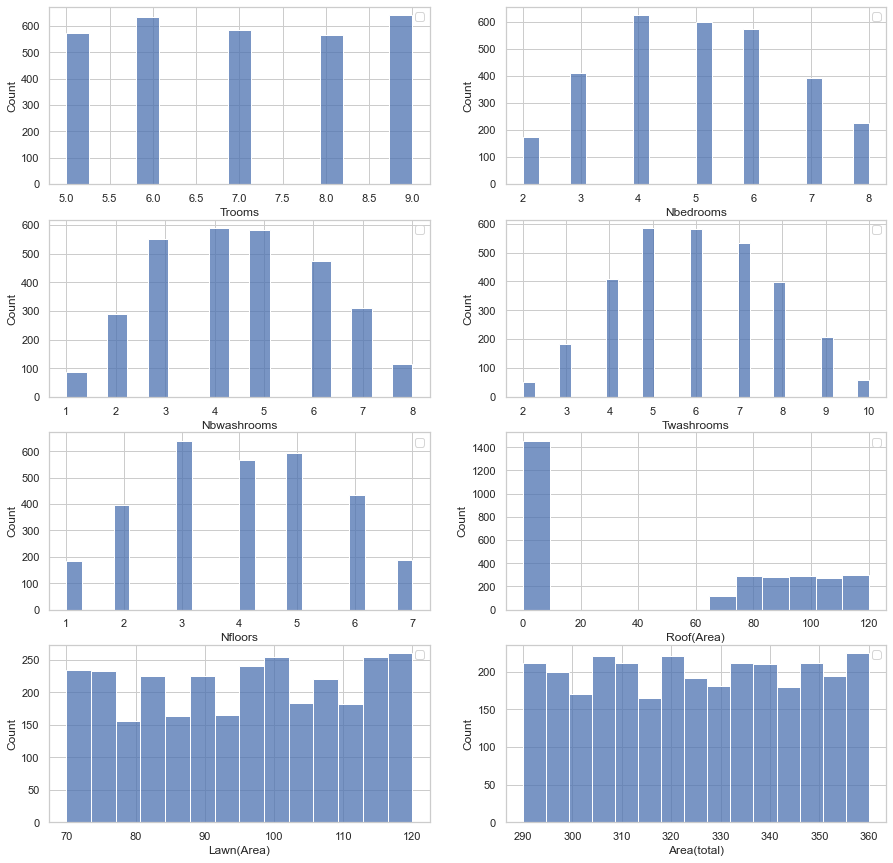

In [5]:
L1=range(421,429)
L2=["Trooms","Nbedrooms","Nbwashrooms","Twashrooms","Nfloors","Roof(Area)","Lawn(Area)","Area(total)"]
count=0
fig,ax = plt.subplots(4,2,figsize=(15,15))
for i in L1:
    plt.subplot(i)
    sb.histplot(data=df,x=df[L2[count]])
    count=count+1
    plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

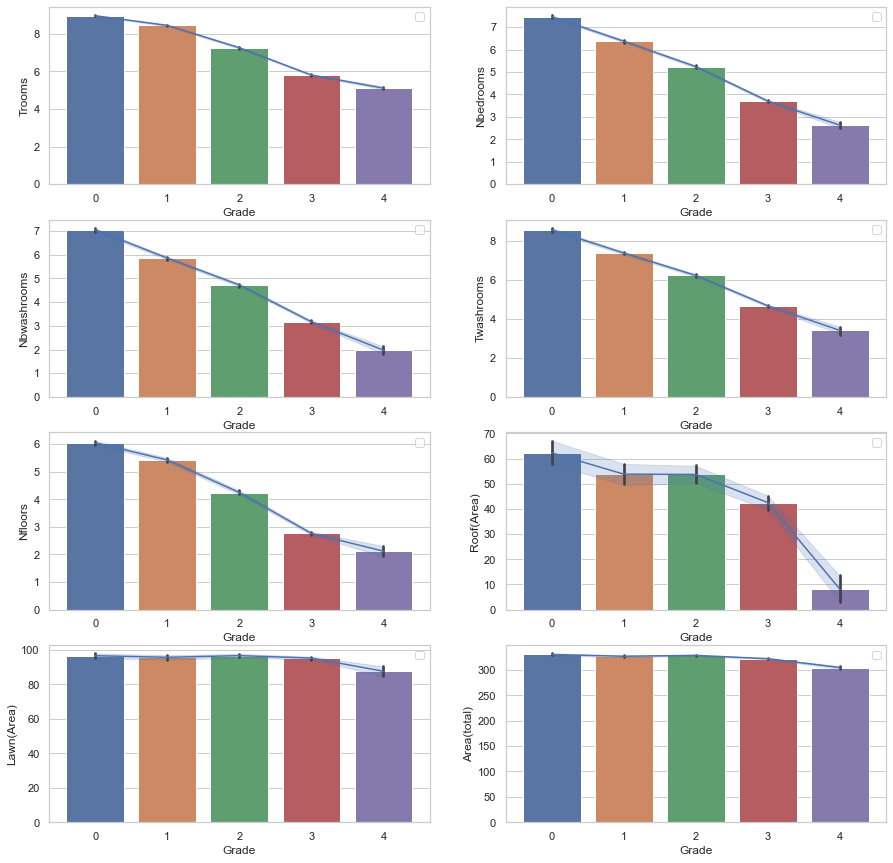

In [6]:
L1=range(421,429)
L2=["Trooms","Nbedrooms","Nbwashrooms","Twashrooms","Nfloors","Roof(Area)","Lawn(Area)","Area(total)"]
count=0
fig,ax = plt.subplots(4,2,figsize=(15,15))
for i in L1:
    plt.subplot(i)
    sb.barplot(data=df,x="Grade",y=L2[count])
    sb.lineplot(data=df,x="Grade",y=L2[count],markers="s")
    count=count+1
    plt.legend(loc='best')

- We can conclude from the graph that number of rooms,bedrooms,washrooms got decreased as grade of house went on increasing.
- avg Roof area for grade "E" houses is very less compared to other grade housesbu the avg lawn area and also avg total area is near about same for all the houses.

<AxesSubplot:xlabel='Grade', ylabel='Expected price'>

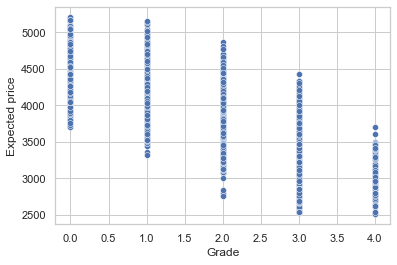

In [7]:
sb.scatterplot(data=df,x="Grade",y="Expected price")

- As we can see here as grade of houses goes on increasing from "A" to "D",the prices of houses are going decreased.As grade goes on descreasing prices of houses goes on decreasing meaning i.e. "A" grade houses are costly houses and and grade goes on increasing expected price goes on reducing.

<AxesSubplot:xlabel='Grade', ylabel='count'>

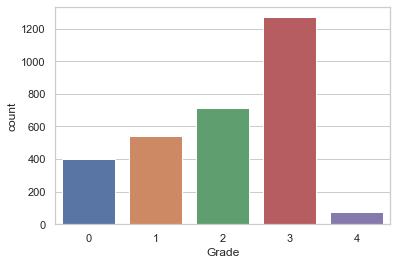

In [8]:
sb.countplot(data=df,x="Grade")

<AxesSubplot:xlabel='Grade', ylabel='count'>

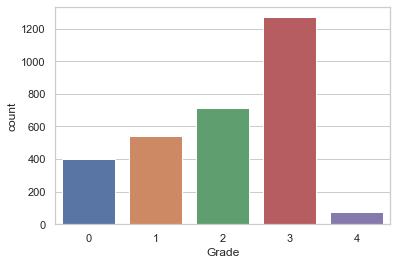

In [9]:
sb.countplot(data=df,x="Grade")

- Most of the houses are "D" grade houses.The count of houses goes on increasing with the grade upto grade "D" and for grade"E" goes down.

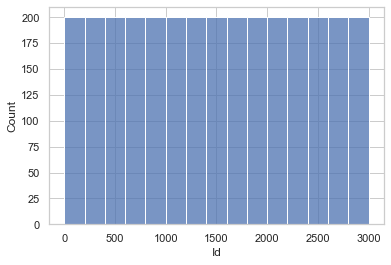

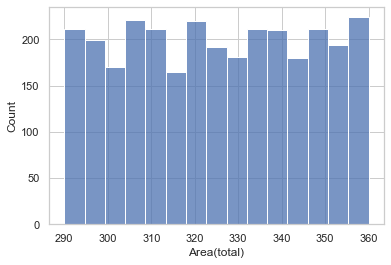

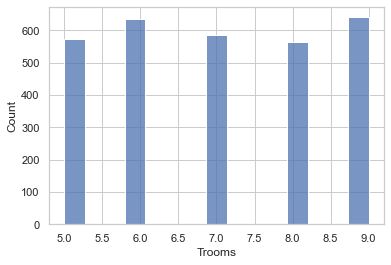

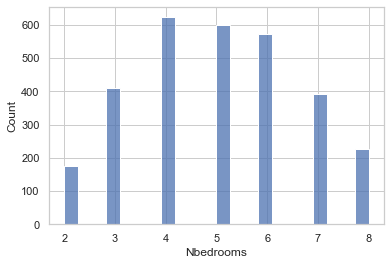

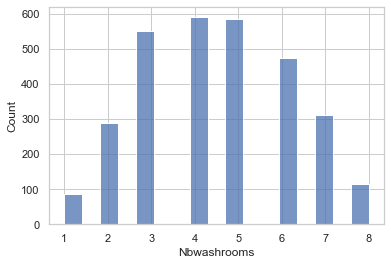

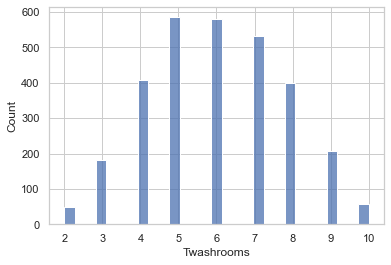

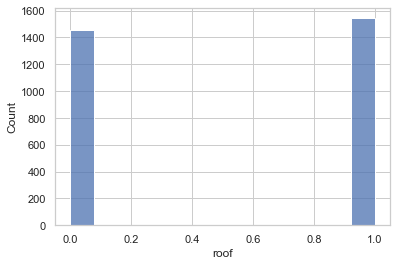

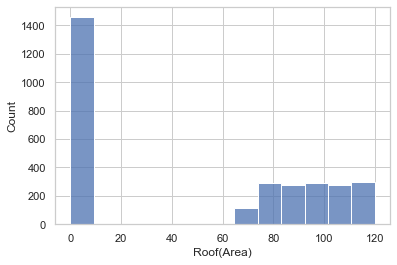

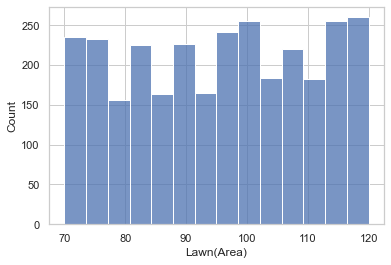

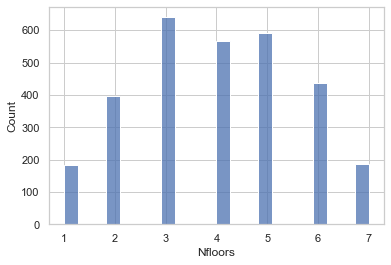

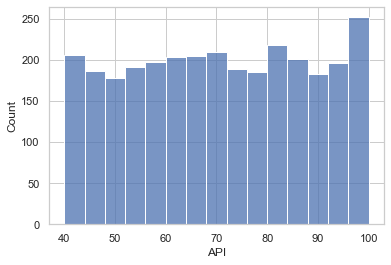

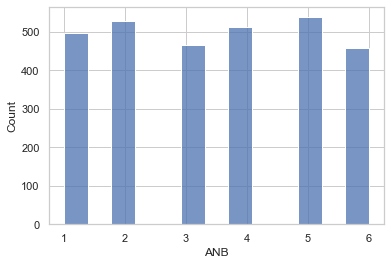

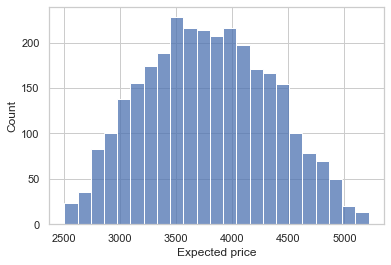

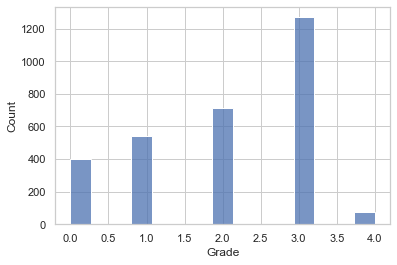

In [10]:
cols=df.columns.to_list()
for i in cols:
    sb.histplot(data=df,x=df[i])
    plt.show()

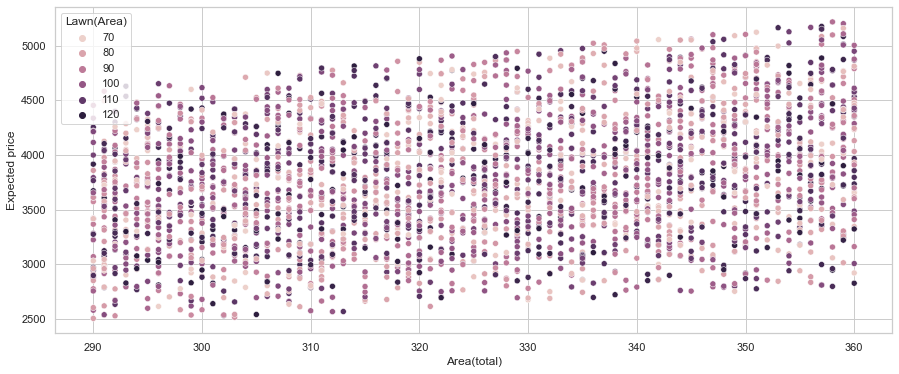

In [11]:
plt.figure(figsize=(15,6))
sb.scatterplot(data=df,x="Area(total)",y="Expected price",hue="Lawn(Area)")
plt.show()

- From the plot we can say that price does not only depend upon the area of plot and lawn area.

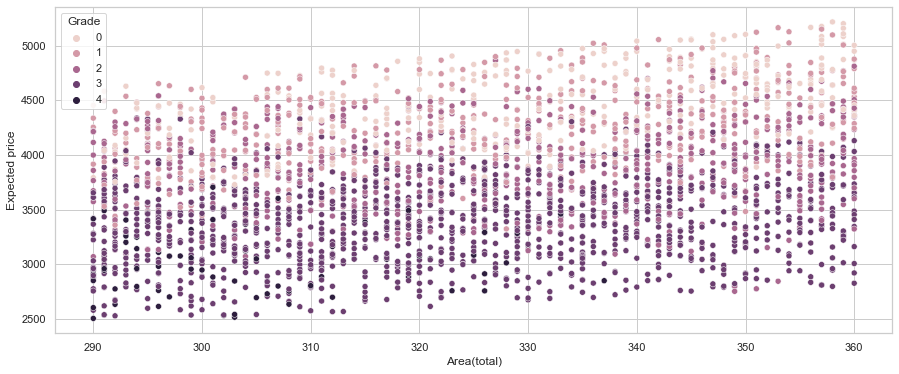

In [95]:
plt.figure(figsize=(15,6))
sb.scatterplot(data=df,x="Area(total)",y="Expected price",hue="Grade")
plt.show()

<AxesSubplot:xlabel='Nbedrooms', ylabel='Expected price'>

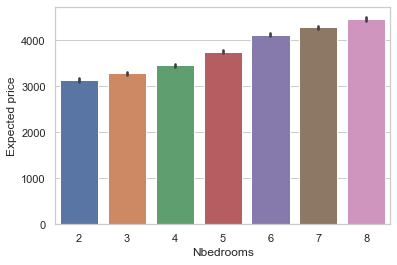

In [12]:
sb.barplot(data=df,x="Nbedrooms",y="Expected price")

- from the graph we can see that with increae in the number of bedrooms the expected price of the houses is going on increasing

In [13]:
df.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


<AxesSubplot:xlabel='Expected price', ylabel='Density'>

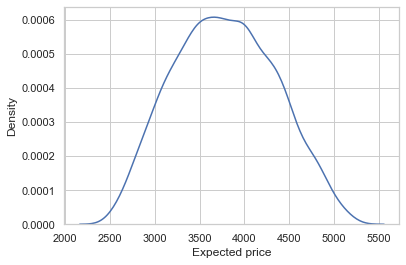

In [14]:
sb.kdeplot(data=df,x="Expected price")

<AxesSubplot:xlabel='Expected price', ylabel='Count'>

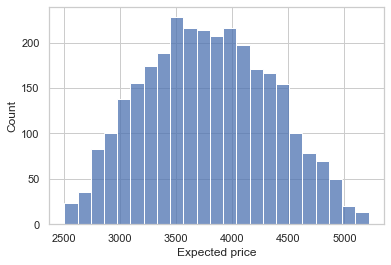

In [15]:
sb.histplot(data=df,x="Expected price")

- from the graph we can see that expected price is uniformly distributed

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              3000 non-null   int64
 1   Area(total)     3000 non-null   int64
 2   Trooms          3000 non-null   int64
 3   Nbedrooms       3000 non-null   int64
 4   Nbwashrooms     3000 non-null   int64
 5   Twashrooms      3000 non-null   int64
 6   roof            3000 non-null   int32
 7   Roof(Area)      3000 non-null   int64
 8   Lawn(Area)      3000 non-null   int64
 9   Nfloors         3000 non-null   int64
 10  API             3000 non-null   int64
 11  ANB             3000 non-null   int64
 12  Expected price  3000 non-null   int64
 13  Grade           3000 non-null   int32
dtypes: int32(2), int64(12)
memory usage: 304.8 KB


In [17]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [18]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,0.514333,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333,2.028333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,0.499878,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995,1.111730
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000,0.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000,1.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,1.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000,2.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,1.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000,3.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,1.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000,4.000000


In [19]:
cols=df.columns.to_list()

### label encoding of the data.

In [20]:
colsx=df.select_dtypes(include="object").columns.to_list()
le=LabelEncoder()
for i in colsx:
    df[i]=pd.DataFrame(le.fit_transform(df[i])) 
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [21]:
dfy=df["Grade"]     ### dependant column 
dfx=df.drop(columns=["Grade","Id"],axis=1)    ### independant column

In [22]:
dfy.unique()

array([3, 2, 1, 0, 4])

In [23]:
dfx.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481
1,358,5,4,3,4,1,71,96,3,72,4,3510
2,324,7,5,4,5,1,101,117,5,64,3,3748
3,330,6,4,3,5,1,101,82,2,59,2,3134
4,320,7,4,4,5,0,0,75,3,40,1,3843


### scaling of the data

In [24]:
sc=StandardScaler()
dfx=pd.DataFrame(sc.fit_transform(dfx),columns=dfx.columns)
dfx.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911


In [25]:
df.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [26]:
df.drop(columns=["Id"],axis=1,inplace=True)

In [29]:
dfx

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550
2996,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792
2997,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245
2998,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908


In [30]:
from sklearn.neighbors import KNeighborsClassifier

## Defining,building,fitting ,cross validating the different classification models with default parameters.

In [71]:
### w.r.t training score
## these inputs are objects in list so we should not give inverted comma otherwise it will get converted into string.
models=[LogisticRegression(multi_class="multinomial"), DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]   

## creating the empy lists for appending scores
k1=[];k2=[];k3=[];k4=[];k5=[]  

## defining or building a model
for j in models:
        m1=j                                           
        cv=StratifiedKFold(n_splits=10)                ## sepcifing the method or technique for cross validation
        scoring=["accuracy", "recall_weighted","precision_weighted","f1_weighted","roc_auc_ovo_weighted"]  ## specifying scores for cross validation
        score=cross_validate(j,dfx,dfy,cv=cv,scoring=scoring,n_jobs=-1,verbose=0,return_estimator=False,error_score="raise",return_train_score=True)  ## cross validating and finding the scores
        k1.append(score["test_accuracy"].mean())       ## appending the scores to empty lists
        k2.append(score["test_recall_weighted"].mean())
        k3.append(score["test_precision_weighted"].mean())
        k4.append(score["test_f1_weighted"].mean())
        k5.append(score["test_roc_auc_ovo_weighted"].mean())
        
dict= {"mean_accuracy_score1":k1, "mean_recall_score1":k2,"mean_precision_score1":k3,"mean_f1_score1":k4,"mean_roc_auc_score1":k5}
df_metrics=pd.DataFrame(dict,index=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaboostClassifier","KNN_classifier"])
df_metrics.sort_values(by="mean_accuracy_score1",ascending=False)  ## storing all the results in dictionary w.r.t descending order       

,mean_accuracy_score1,mean_recall_score1,mean_precision_score1,mean_f1_score1,mean_roc_auc_score1
LogisticRegression,0.955667,0.955667,0.956771,0.955250,0.997116
RandomForestClassifier,0.906000,0.906000,0.908422,0.902710,0.987091
KNN_classifier,0.869333,0.869333,0.869955,0.867437,0.967994
DecisionTreeClassifier,0.845333,0.845333,0.845266,0.844364,0.865030
AdaboostClassifier,0.604000,0.604000,0.610658,0.577008,0.730779


- Here we can see and get general idea about which models are going to perform on the given dataset w.r.t default parameters .
- Now we should use some more techniques to improve the performance of models like gridsearch method on each model.
- Here, we can see we got a good performance for LOGISTIC regression as well as random forest w.r.t default hyperparamters and lowest for adaboost classifier.

In [72]:
### w.r.t testing score

models=[LogisticRegression(multi_class="multinomial"), DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]   

## creating the empy lists for appending scores
k1=[];k2=[];k3=[];k4=[];k5=[]  

## defining or building a model
for j in models:
        m1=j                                           
        cv=StratifiedKFold(n_splits=10)                ## sepcifing the method or technique for cross validation
        scoring=["accuracy", "recall_weighted","precision_weighted","f1_weighted","roc_auc_ovo_weighted"]  ## specifying scores for cross validation
        score=cross_validate(j,dfx,dfy,cv=cv,scoring=scoring,n_jobs=-1,verbose=0,return_estimator=False,error_score="raise",return_train_score=False)  ## cross validating and finding the scores
        k1.append(score["test_accuracy"].mean())       ## appending the scores to empty lists
        k2.append(score["test_recall_weighted"].mean())
        k3.append(score["test_precision_weighted"].mean())
        k4.append(score["test_f1_weighted"].mean())
        k5.append(score["test_roc_auc_ovo_weighted"].mean())
        
dict= {"mean_accuracy_score1":k1, "mean_recall_score1":k2,"mean_precision_score1":k3,"mean_f1_score1":k4,"mean_roc_auc_score1":k5}
df_metrics=pd.DataFrame(dict,index=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaboostClassifier","KNN_classifier"])
df_metrics.sort_values(by="mean_accuracy_score1",ascending=False)  ## storing all the results in dictionary w.r.t descending order       

,mean_accuracy_score1,mean_recall_score1,mean_precision_score1,mean_f1_score1,mean_roc_auc_score1
LogisticRegression,0.955667,0.955667,0.956771,0.955250,0.997116
RandomForestClassifier,0.900333,0.900333,0.902049,0.896384,0.987691
KNN_classifier,0.869333,0.869333,0.869955,0.867437,0.967994
DecisionTreeClassifier,0.850333,0.850333,0.850517,0.849306,0.868376
AdaboostClassifier,0.604000,0.604000,0.610658,0.577008,0.730779


### Logistic Regression

In [73]:
score=cross_val_predict(LogisticRegression(multi_class="multinomial"),dfx,dfy,cv=cv)
score

array([3, 3, 2, ..., 3, 1, 1])

In [78]:
df["y_predict"]=score
df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,predicted_grade,y_predict
0,339,6,5,4,6,0,0,76,2,79,6,3481,3,3,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3,3,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2,2,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3,3,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3,3,3


In [92]:
x=df.iloc[:,[0,11]].values

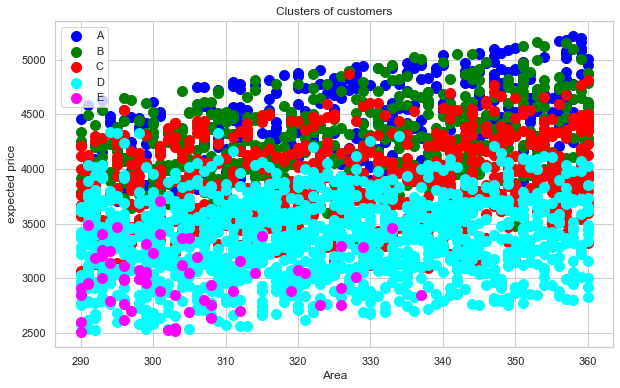

In [94]:
#visulaizing the clusters  
plt.figure(figsize=(10,6))
plt.scatter(x[score == 0, 0], x[score == 0, 1], s = 100, c = 'blue', label = 'A') #for first cluster  
plt.scatter(x[score == 1, 0], x[score == 1, 1], s = 100, c = 'green', label = 'B') #for second cluster  
plt.scatter(x[score== 2, 0],  x[score == 2, 1], s = 100, c = 'red', label = 'C') #for third cluster  
plt.scatter(x[score == 3, 0], x[score == 3, 1], s = 100, c = 'cyan', label = 'D') #for fourth cluster  
plt.scatter(x[score == 4, 0], x[score == 4, 1], s = 100, c = 'magenta', label = 'E') #for fifth cluster  

plt.title('Clusters of customers')  
plt.xlabel('Area')  
plt.ylabel('expected price')  
plt.legend()  
plt.show()

In [99]:
x=df.iloc[:,[0,1]].values

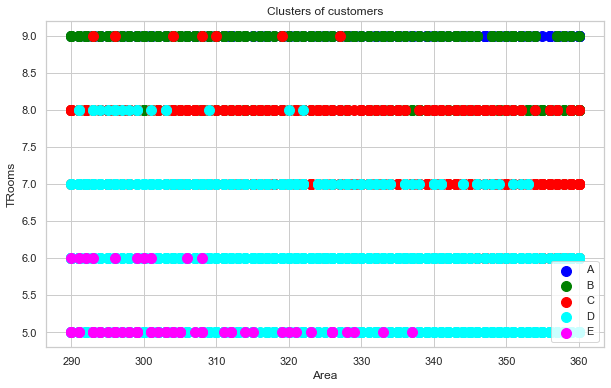

In [100]:
#visulaizing the clusters  
plt.figure(figsize=(10,6))
plt.scatter(x[score == 0, 0], x[score == 0, 1], s = 100, c = 'blue', label = 'A') #for first cluster  
plt.scatter(x[score == 1, 0], x[score == 1, 1], s = 100, c = 'green', label = 'B') #for second cluster  
plt.scatter(x[score== 2, 0],  x[score == 2, 1], s = 100, c = 'red', label = 'C') #for third cluster  
plt.scatter(x[score == 3, 0], x[score == 3, 1], s = 100, c = 'cyan', label = 'D') #for fourth cluster  
plt.scatter(x[score == 4, 0], x[score == 4, 1], s = 100, c = 'magenta', label = 'E') #for fifth cluster  

plt.title('Clusters of customers')  
plt.xlabel('Area')  
plt.ylabel('TRooms')  
plt.legend()  
plt.show()

#### Conclusion: From the results,logistic regression works best for the given the data for classification of house grades compared with the other models.Houses of grade C are present in all area ranges also in price ranges so they are affortable for both common people.